# Курсовая работа по ОММиАД
## Выполнили: Жукова Полина и Ковалёва Анна - ПрИн-367

### Данная работа состоит из следующих разделов:
   
   1. Изучение существующих характеристик 
   2. Выработка новых характеристик 
   3. Визуализация данных 
   4. Постановка гипотез и их проверка
   5. Анализ существующих зависимостей 
   6. Построения модели

## 1. Изучение существующих характеристик

Для начала импортируем необходимые библиотеки:

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sc
from scipy import stats

Объединим весь репозиторий дыхания в один набор данных:

In [346]:
breath = {}
for i in range(86):
    name = "Репозиторий дыхания/" + str(i+1) + "_обычное.tsv"
    breath[i*4] = pd.read_csv(name, sep=' ', names=['time','x_1', 'y_1','z_1','x_2','y_2', 'z_2','x_3','y_3','z_3','kgr'])
    
    name = "Репозиторий дыхания/" + str(i+1) + "_грудное.tsv"
    breath[i*4+1] = pd.read_csv(name, sep=' ', names=['time','x_1', 'y_1','z_1','x_2','y_2', 'z_2','x_3','y_3','z_3','kgr'])
    
    name = "Репозиторий дыхания/" + str(i+1) + "_брюшное.tsv"
    breath[i*4+2] = pd.read_csv(name, sep=' ', names=['time','x_1', 'y_1','z_1','x_2','y_2', 'z_2','x_3','y_3','z_3','kgr'])
    
    name = "Репозиторий дыхания/" + str(i+1) + "_смешанное.tsv"
    breath[i*4+3] = pd.read_csv(name, sep=' ', names=['time','x_1', 'y_1','z_1','x_2','y_2', 'z_2','x_3','y_3','z_3','kgr'])
breath

{0:           time    x_1    y_1    z_1    x_2    y_2    z_2    x_3    y_3    z_3  \
 0     0.042694  0.671 -1.446  4.374  0.886 -1.535  4.490  0.686 -1.615  4.322   
 1     0.101616  0.669 -1.445  4.370  0.885 -1.536  4.489  0.686 -1.616  4.322   
 2     0.147629  0.669 -1.446  4.370  0.884 -1.535  4.489  0.685 -1.616  4.321   
 3     0.245777  0.669 -1.447  4.372  0.883 -1.536  4.488  0.685 -1.616  4.320   
 4     0.275127  0.668 -1.448  4.375  0.882 -1.536  4.487  0.683 -1.616  4.318   
 ..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 895  59.667480  0.684 -1.439  4.384  0.908 -1.535  4.494  0.701 -1.611  4.326   
 896  59.736210  0.684 -1.439  4.383  0.907 -1.535  4.494  0.701 -1.612  4.326   
 897  59.800120  0.684 -1.439  4.381  0.907 -1.535  4.494  0.701 -1.612  4.327   
 898  59.897910  0.684 -1.438  4.378  0.907 -1.535  4.494  0.702 -1.613  4.328   
 899  59.952230  0.684 -1.438  4.378  0.907 -1.535  4.494  0.702 -1.613  4.329   
 
           

Посмотрим, какого формата данные:

In [347]:
breath[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    900 non-null    float64
 1   x_1     900 non-null    float64
 2   y_1     900 non-null    float64
 3   z_1     900 non-null    float64
 4   x_2     900 non-null    float64
 5   y_2     900 non-null    float64
 6   z_2     900 non-null    float64
 7   x_3     900 non-null    float64
 8   y_3     900 non-null    float64
 9   z_3     900 non-null    float64
 10  kgr     900 non-null    float64
dtypes: float64(11)
memory usage: 77.5 KB


Видим, что все данные - числа с плавающей запятой. Нет пропусков.
Далее загрузим данные о участниках исследования:

In [348]:
data = pd.read_csv('actors.csv', sep=';')
data

,ID,birth,sex,covid,start,end,lung_damage,damage_percent,type
0,1,04.07.2003,M,False,00.00.0000,00.00.0000,False,0,обычное
1,1,04.07.2003,M,False,00.00.0000,00.00.0000,False,0,грудное
2,1,04.07.2003,M,False,00.00.0000,00.00.0000,False,0,брюшное
3,1,04.07.2003,M,False,00.00.0000,00.00.0000,False,0,смешанное
4,2,07.09.2001,M,False,00.00.0000,00.00.0000,False,0,обычное
...,...,...,...,...,...,...,...,...,...
339,85,14.09.2003,F,False,00.00.0000,00.00.0000,False,0,смешанное
340,86,24.11.2003,M,False,00.00.0000,00.00.0000,False,0,обычное
341,86,24.11.2003,M,False,00.00.0000,00.00.0000,False,0,грудное
342,86,24.11.2003,M,False,00.00.0000,00.00.0000,False,0,брюшное


Проверим количество людей по полу:

In [349]:
data['sex'].value_counts()/4

M    67.0
F    19.0
Name: sex, dtype: float64

Видно, что бОльшая часть - мужчины.

Проверим количество переболевших COVID-19:

In [350]:
data['covid'].value_counts()/4

False    46.0
True     40.0
Name: covid, dtype: float64

Видно, примерно равное количество людей болевших и неболевших.

Проверим количество людей с поражением лёгких:

In [351]:
data['lung_damage'].value_counts()/4

False    82.0
True      4.0
Name: lung_damage, dtype: float64

Всего 4 человека имеют поражение лёгких. Поэтому данный критерий решено было исключить из исследования, потому что слишком мало данных. Так же стоит исключить данные про процент поражения и даты начала и конца болезни (так как не представляются существенными при данном наборе данных).

In [352]:
data = data.drop(columns=['start', 'end', 'lung_damage','damage_percent'])
data

,ID,birth,sex,covid,type
0,1,04.07.2003,M,False,обычное
1,1,04.07.2003,M,False,грудное
2,1,04.07.2003,M,False,брюшное
3,1,04.07.2003,M,False,смешанное
4,2,07.09.2001,M,False,обычное
...,...,...,...,...,...
339,85,14.09.2003,F,False,смешанное
340,86,24.11.2003,M,False,обычное
341,86,24.11.2003,M,False,грудное
342,86,24.11.2003,M,False,брюшное


## 2. Выработка новых характеристик

В качестве новых характеристик, которые могли бы помочь нашему исследованию, были выбраны: векторные и скалярные скорости изменения координат маркеров в пространстве (грудного и брюшного относительно спинного), расстояния между маркерами, средние амплитуды и частоты дыхания.

Начнём с амплитуды. Найдем разницу координат 1 и 2 маркеров относительно третьего, далее - само расстояние, а после - максимальное отклонение от среднего значения, т.е. амплитуду. После выберем среднюю амплитуду.

In [353]:
data.insert(4, 'amplitude', 0)
for i in range(344):
    del_x1 = breath[i]['x_1']-breath[i]['x_3']
    breath[i].insert(10, 'del_x1', del_x1)
    
    del_y1 = breath[i]['y_1']-breath[i]['y_3']
    breath[i].insert(11, 'del_y1', del_y1)
    
    del_z1 = breath[i]['z_1']-breath[i]['z_3']
    breath[i].insert(12, 'del_z1', del_z1)

    
    del_x2 = breath[i]['x_2']-breath[i]['x_3']
    breath[i].insert(13, 'del_x2', del_x2)
    
    del_y2 = breath[i]['y_2']-breath[i]['y_3']
    breath[i].insert(14, 'del_y2', del_y2)
    
    del_z2 = breath[i]['z_2']-breath[i]['z_3']
    breath[i].insert(15, 'del_z2', del_z2)
    
    
    del_1 = (pow(del_x1,2) + pow(del_y1, 2) + pow(del_z1,2))**(0.5)
    breath[i].insert(16, 'del_1', del_1)
    
    del_2 = (pow(del_x2,2) + pow(del_y2, 2) + pow(del_z2,2))**(0.5)
    breath[i].insert(17, 'del_2', del_2)
    
    ampl_1 = max(del_1 - del_1.mean())
    ampl_2 = max(del_2 - del_2.mean())
    
    ampl = (ampl_1+ampl_2)/2
    data.loc[i, 'amplitude'] = ampl

Далее поработаем с частотой:

In [354]:
data.insert(5, 'frequency', 0)
for i in range(344):
    freq1 = sc.find_peaks(breath[i]['del_1'], distance=50)[0].size
    freq2 = sc.find_peaks(breath[i]['del_2'], distance=50)[0].size
    
    data.loc[i, 'frequency'] = round((freq1+freq2)/2)
    
data

,ID,birth,sex,covid,amplitude,frequency,type
0,1,04.07.2003,M,False,0.009956,13,обычное
1,1,04.07.2003,M,False,0.014353,12,грудное
2,1,04.07.2003,M,False,0.014028,16,брюшное
3,1,04.07.2003,M,False,0.014438,12,смешанное
4,2,07.09.2001,M,False,0.017803,14,обычное
...,...,...,...,...,...,...,...
339,85,14.09.2003,F,False,0.013309,13,смешанное
340,86,24.11.2003,M,False,0.012337,14,обычное
341,86,24.11.2003,M,False,0.013156,14,грудное
342,86,24.11.2003,M,False,0.011709,14,брюшное


Теперь мы можем найти проекции на оси скорости изменения макреров в пространстве, через них мы найдём вектор скорости каждого маркера и её модуль. Среднюю скорость для каждого замера дыхания запишем в главную таблицу.

In [355]:
speed = {}
data.insert(6, 'v1_avg', 0)
data.insert(7, 'v2_avg', 0)
for i in range(344):
    speed[i] = breath[i][['time', 'x_1']]
    
    v1_x = (breath[i]['del_x1'].shift(1) - breath[i]['del_x1']) 
    / (breath[i]['time'].shift(1) - breath[i]['time'])
    speed[i].insert(1,'v1_x', v1_x)
    speed[i].loc[0,'v1_x'] = 0
    
    v1_y = (breath[i]['del_y1'].shift(1) - breath[i]['del_y1']) 
    / (breath[i]['time'].shift(1) - breath[i]['time'])
    speed[i].insert(2,'v1_y', v1_y)
    speed[i].loc[0,'v1_y'] = 0
    
    v1_z = (breath[i]['del_z1'].shift(1) - breath[i]['del_z1']) 
    / (breath[i]['time'].shift(1) - breath[i]['time'])
    speed[i].insert(3,'v1_z', v1_z)
    speed[i].loc[0,'v1_z'] = 0
    
    v2_x = (breath[i]['del_x2'].shift(1) - breath[i]['del_x2']) 
    / (breath[i]['time'].shift(1) - breath[i]['time'])
    speed[i].insert(4,'v2_x', v2_x)
    speed[i].loc[0,'v2_x'] = 0
    
    v2_y = (breath[i]['del_y2'].shift(1) - breath[i]['del_y2']) 
    / (breath[i]['time'].shift(1) - breath[i]['time'])
    speed[i].insert(5,'v2_y', v2_y)
    speed[i].loc[0,'v2_y'] = 0
    
    v2_z = (breath[i]['del_z2'].shift(1) - breath[i]['del_z2']) 
    / (breath[i]['time'].shift(1) - breath[i]['time'])
    speed[i].insert(6,'v2_z', v2_z)
    speed[i].loc[0,'v2_z'] = 0
    
    v1 = (pow(v1_x,2) + pow(v1_y, 2) + pow(v1_z,2))**(0.5)
    speed[i].insert(7, 'v1', v1)
    speed[i].loc[0,'v1'] = 0
    
    v2 = (pow(v2_x,2) + pow(v2_y, 2) + pow(v2_z,2))**(0.5)
    speed[i].insert(8, 'v2', v2)
    speed[i].loc[0,'v2'] = 0
    
    speed[i] = speed[i].drop(columns=['x_1'])
    
    data.loc[i, 'v1_avg'] = speed[i]['v1'].mean()
    data.loc[i, 'v2_avg'] = speed[i]['v2'].mean()
    
speed[0]

,time,v1_x,v1_y,v1_z,v2_x,v2_y,v2_z,v1,v2
0,0.042694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.101616,-0.033943,0.033943,-0.067886,-0.016972,-0.000000,-0.016972,0.083143,0.024001
2,0.147629,0.021733,-0.021733,0.021733,-0.000000,0.021733,0.021733,0.037643,0.030735
3,0.245777,-0.000000,-0.010189,0.030566,-0.010189,-0.010189,-0.000000,0.032219,0.014409
4,0.275127,0.034072,-0.034072,0.170358,0.034072,-0.000000,0.034072,0.177041,0.048184
...,...,...,...,...,...,...,...,...,...
895,59.667480,-0.000000,-0.030414,0.045620,0.015207,-0.015207,0.045620,0.054829,0.050435
896,59.736210,-0.000000,0.014550,-0.014550,-0.014550,0.014550,-0.000000,0.020576,0.020576
897,59.800120,-0.000000,-0.000000,-0.046941,-0.000000,-0.000000,-0.015647,0.046941,0.015647
898,59.897910,-0.010226,0.020452,-0.040904,-0.010226,0.010226,-0.010226,0.046861,0.017712


Теперь мы имеем отдельный набор таблиц, в которой хранятся все данные по скоростям

Посмотрим, что в главной таблице:

In [356]:
data

,ID,birth,sex,covid,amplitude,frequency,v1_avg,v2_avg,type
0,1,04.07.2003,M,False,0.009956,13,0.042991,0.026899,обычное
1,1,04.07.2003,M,False,0.014353,12,0.037501,0.027864,грудное
2,1,04.07.2003,M,False,0.014028,16,0.040008,0.036282,брюшное
3,1,04.07.2003,M,False,0.014438,12,0.036109,0.031944,смешанное
4,2,07.09.2001,M,False,0.017803,14,0.022237,0.028557,обычное
...,...,...,...,...,...,...,...,...,...
339,85,14.09.2003,F,False,0.013309,13,0.026568,0.026831,смешанное
340,86,24.11.2003,M,False,0.012337,14,0.028424,0.027492,обычное
341,86,24.11.2003,M,False,0.013156,14,0.026230,0.028208,грудное
342,86,24.11.2003,M,False,0.011709,14,0.028158,0.029159,брюшное


Выработка новых характеристик окончена

## 3. Визуализация данных

1) График изменения дистанции между грудным-спинным и брюшным-спинным со временем

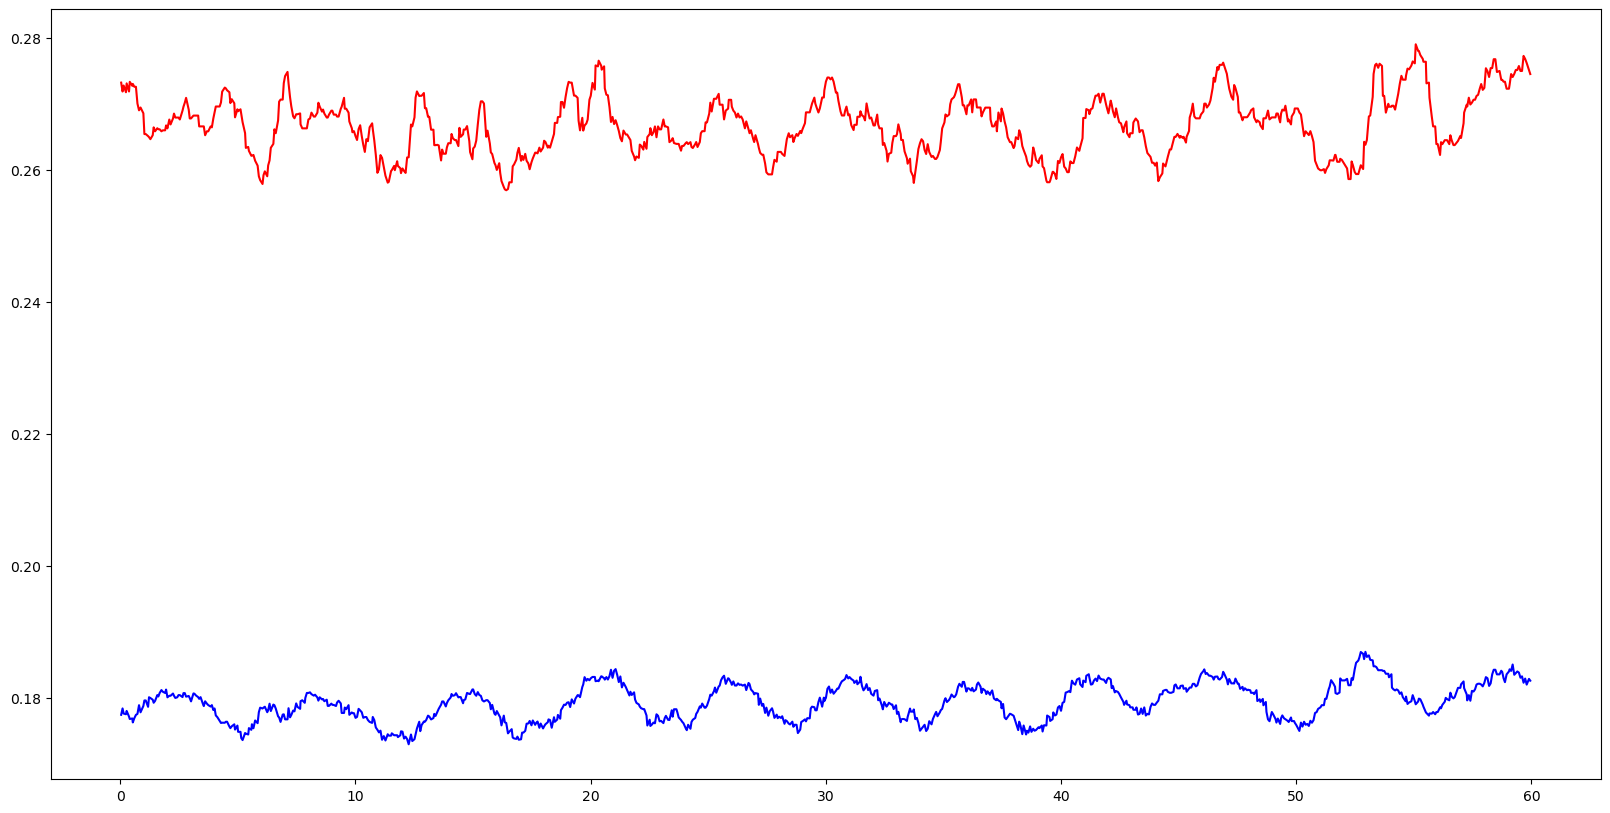

In [357]:
plt.figure(figsize=(20, 10))
plt.plot(breath[0]['time'], breath[0]['del_1'], 'b', breath[0]['time'], breath[0]['del_2'], 'r')

2) График изменения проекций скорости второго маркера со временем

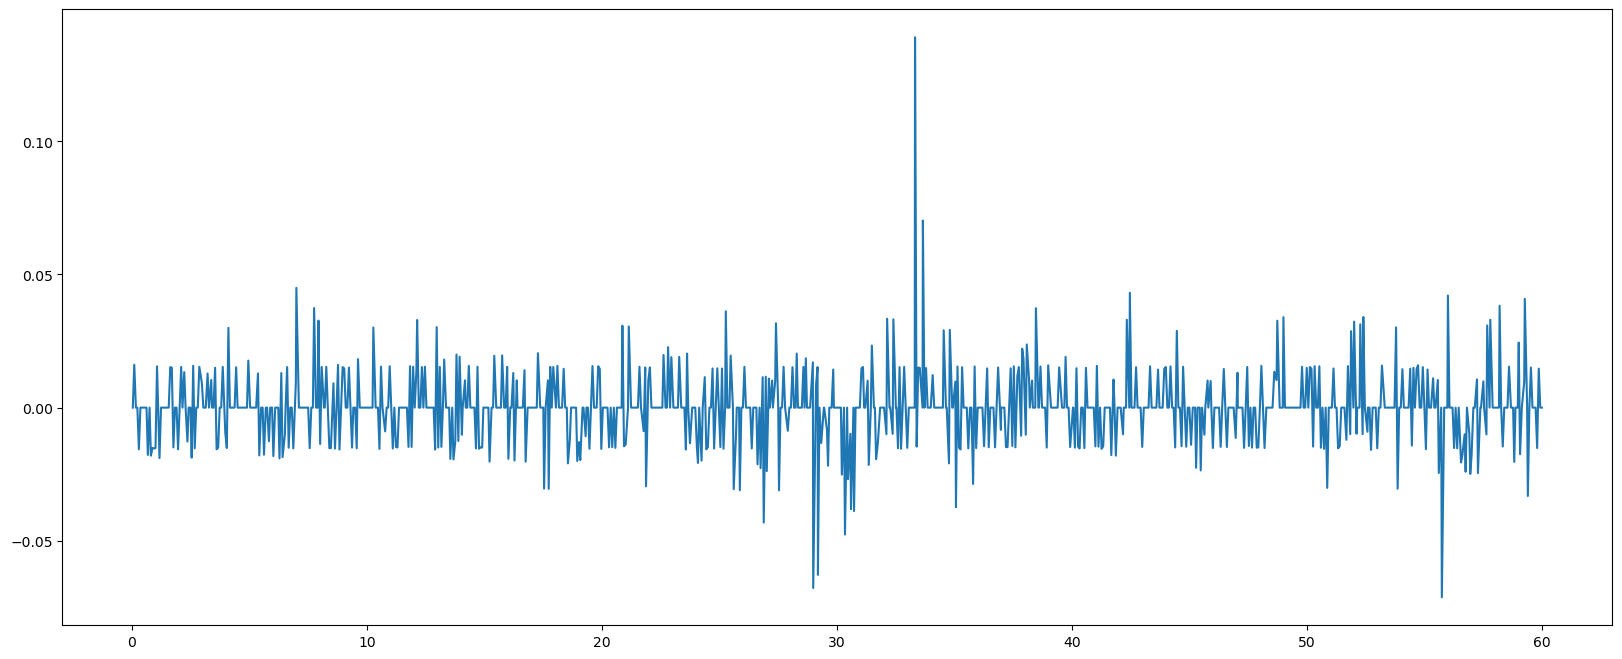

In [358]:
plt.figure(figsize=(20, 8))
plt.plot(speed[1]['time'], speed[1]['v2_x'])

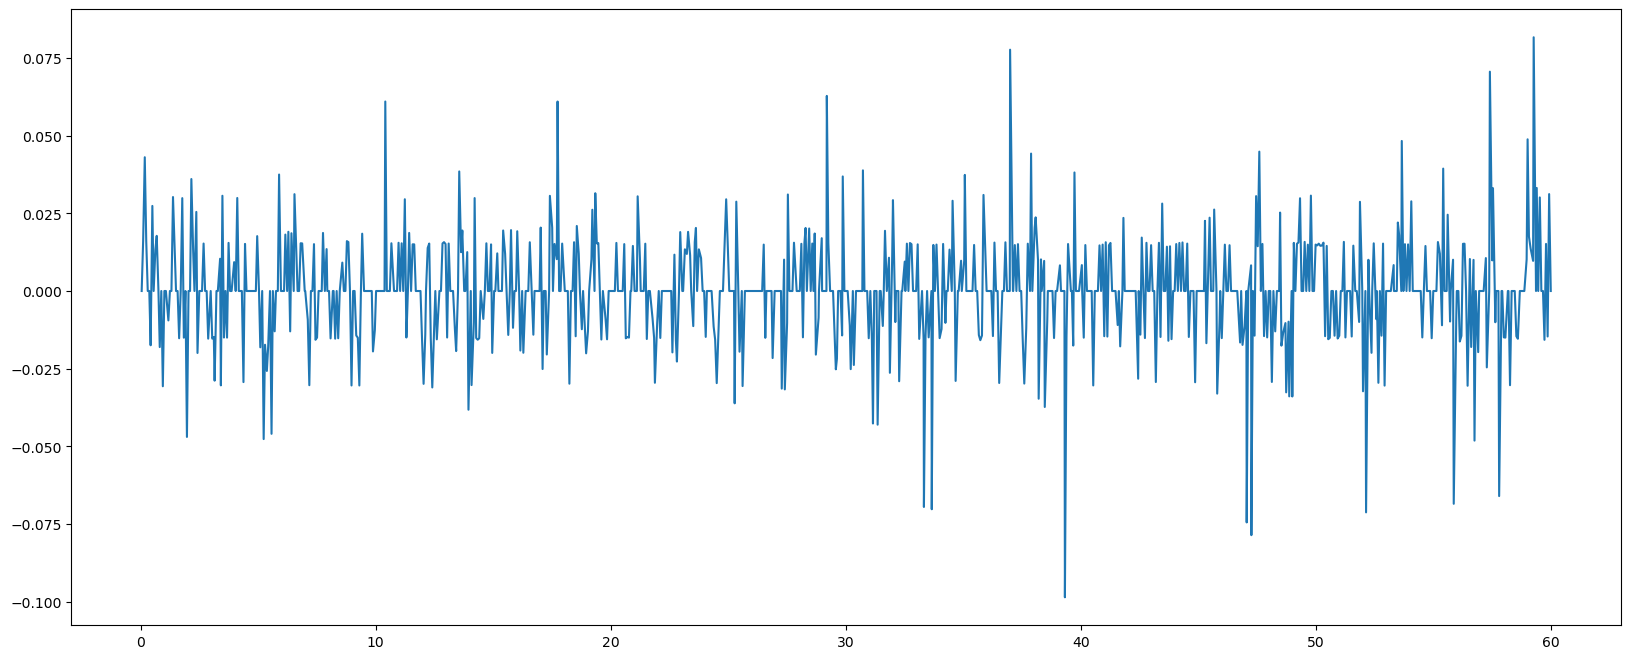

In [359]:
plt.figure(figsize=(20, 8))
plt.plot(speed[1]['time'], speed[1]['v2_y'])

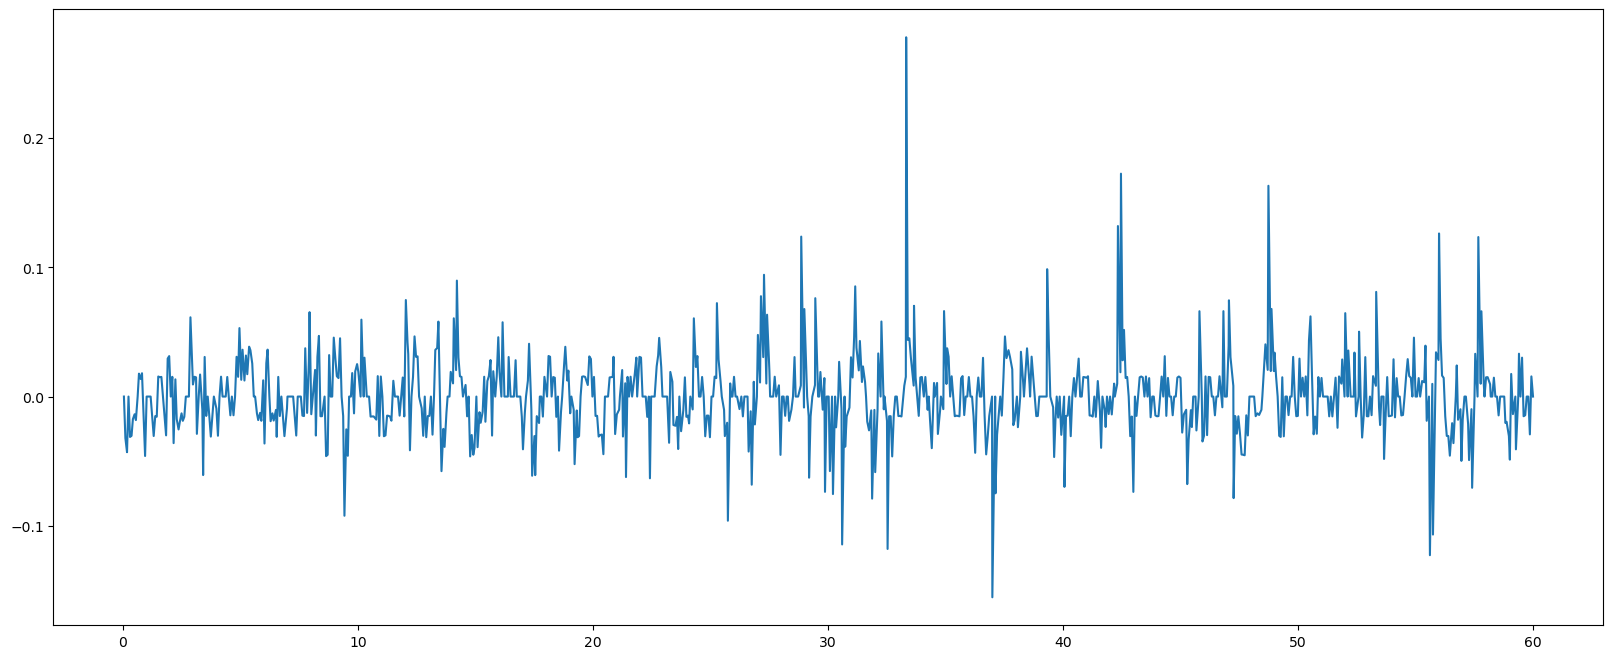

In [360]:
plt.figure(figsize=(20, 8))
plt.plot(speed[1]['time'], speed[1]['v2_z'])

3) График изменения модуля скорости со временем

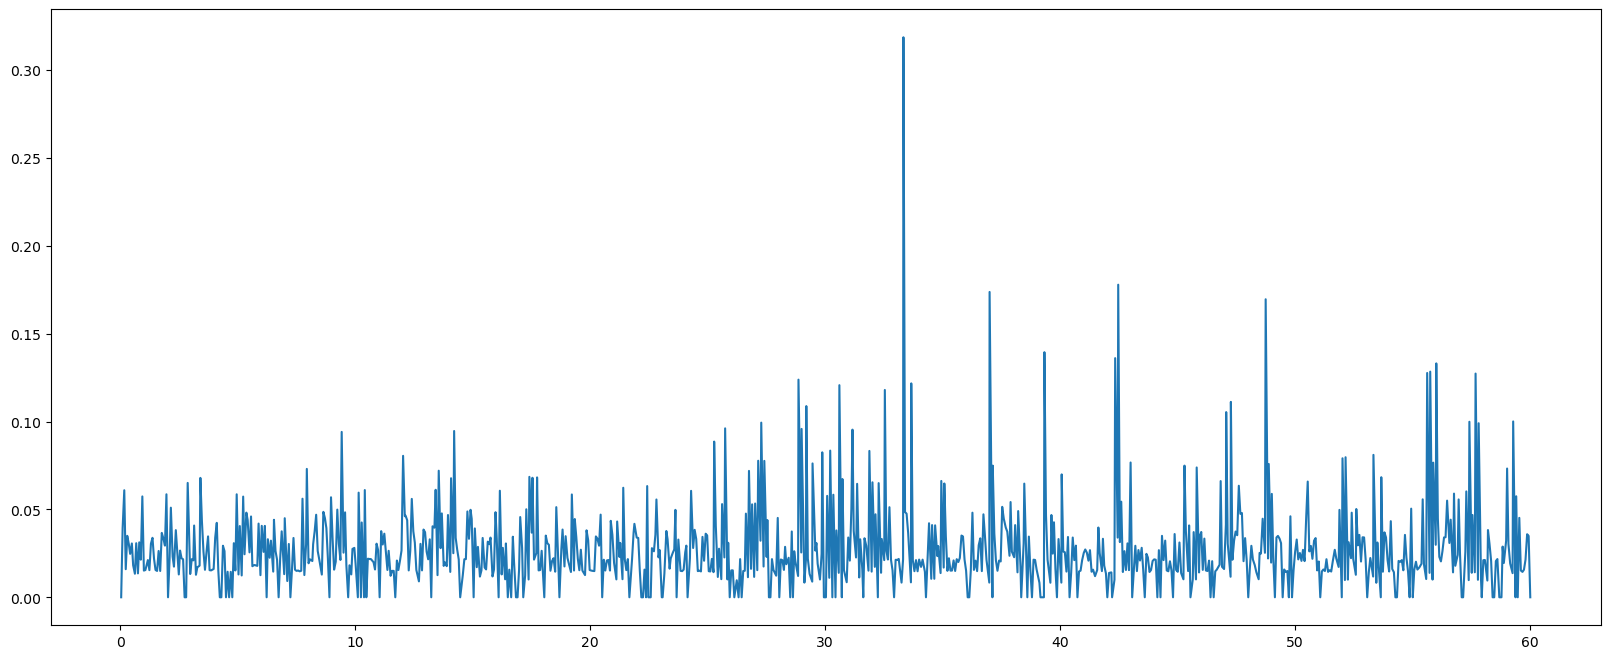

In [361]:
plt.figure(figsize=(20, 8))
plt.plot(speed[1]['time'], speed[1]['v2'])

4) Гистограмма частот

(array([  2.,   0.,   0.,   0.,   0.,   0.,  42., 252.,  32.,  16.]),
 array([ 3. ,  4.4,  5.8,  7.2,  8.6, 10. , 11.4, 12.8, 14.2, 15.6, 17. ]),
 <BarContainer object of 10 artists>)

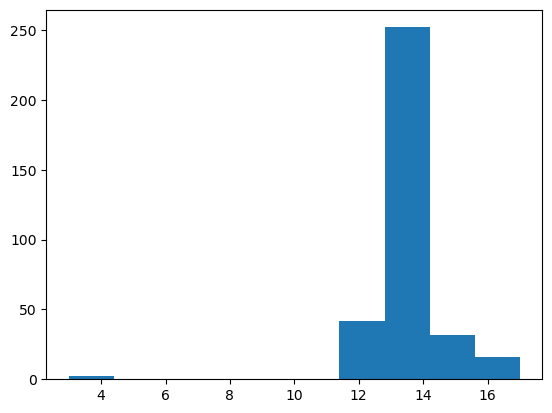

In [362]:
plt.hist(data['frequency'])

5) Диаграмма рассеивания частот по типу дыхания

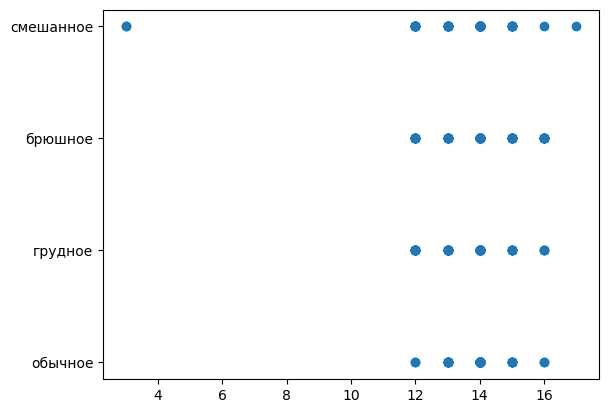

In [363]:
plt.scatter(x=data['frequency'], y=data['type'])

Видно яркий выброс - значения около 3-4 для частоты слишком мало. Посмотрим, в каких записях проблема:

In [364]:
i = data['frequency']<10
data[i]

,ID,birth,sex,covid,amplitude,frequency,v1_avg,v2_avg,type
31,8,04.08.2000,M,False,0.008931,3,0.020493,0.025404,смешанное
35,9,03.04.2000,M,True,0.032951,3,0.145884,0.159756,смешанное


Судя по оригинальным файлам эти замеры имеют записи только на 14 секунд, поэтому стоит от них избавиться.

In [365]:
data = data.drop([31,35])

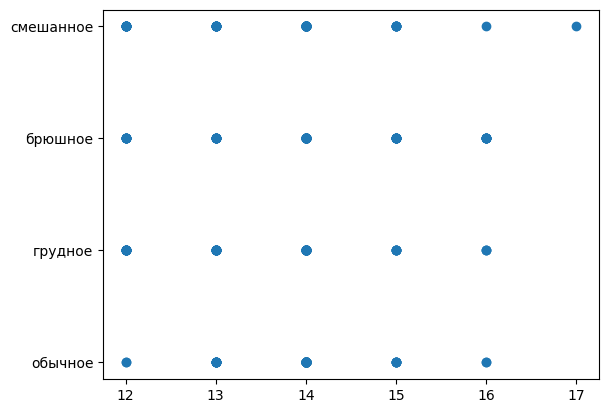

In [366]:
plt.scatter(x=data['frequency'], y=data['type'])

Теперь всё в порядке и видно, что значения частот находятся в диапазоне от 12 до 16 (17 в смешанном типе)

6) Диаграмма рассеивания амплитуд по типу дыхания

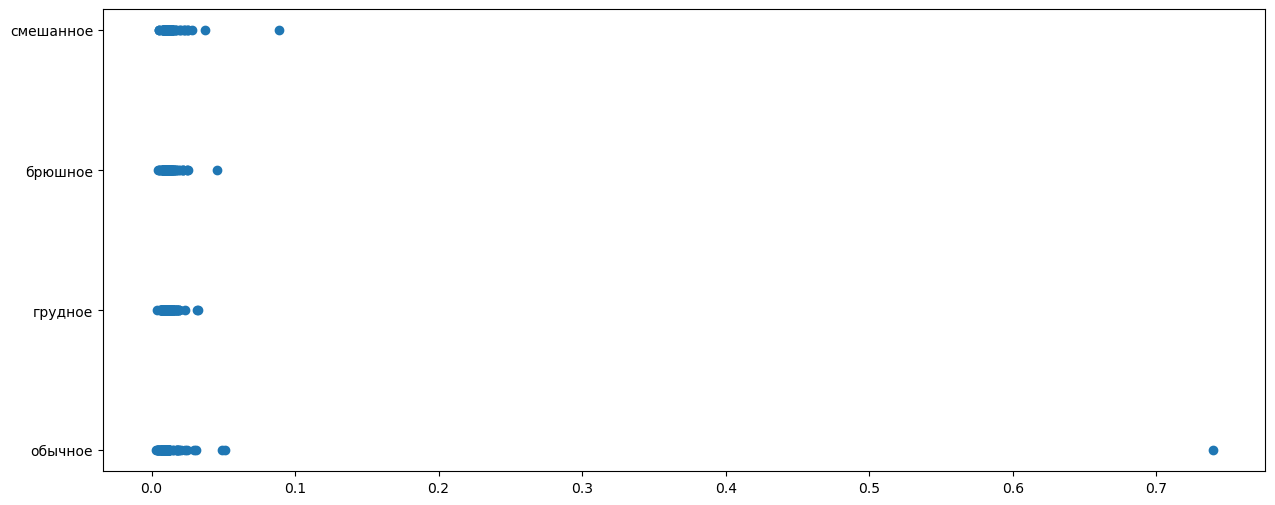

In [367]:
plt.figure(figsize=(15, 6))
plt.scatter(x=data['amplitude'], y=data['type'])

Снова заметны выбросы (один очень яркий). Посмотрим, в каких записях проблемы, и избавимся от них:

In [368]:
i = data['amplitude']>0.06
data[i]

,ID,birth,sex,covid,amplitude,frequency,v1_avg,v2_avg,type
192,49,25.12.2002,M,False,0.739231,14,0.160137,0.160511,обычное
243,61,30.10.2002,F,False,0.088585,14,0.071293,0.073741,смешанное


In [369]:
data = data.drop([192, 243])

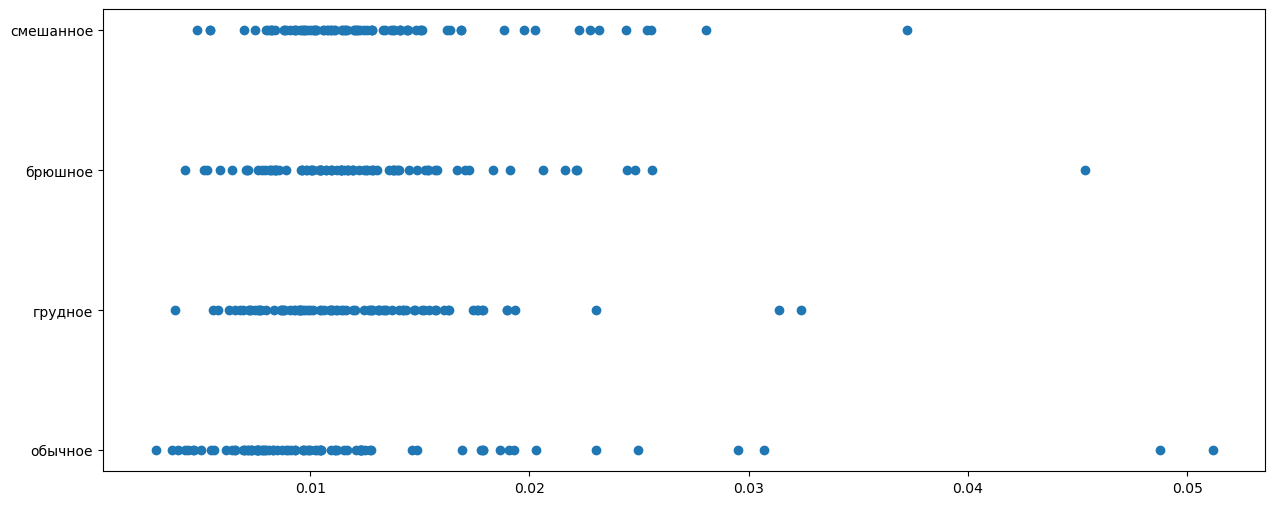

In [370]:
plt.figure(figsize=(15, 6))
plt.scatter(x=data['amplitude'], y=data['type'])

7) Диаграмма рассеивания средней скорости первого и второго маркеров по типу дыхания

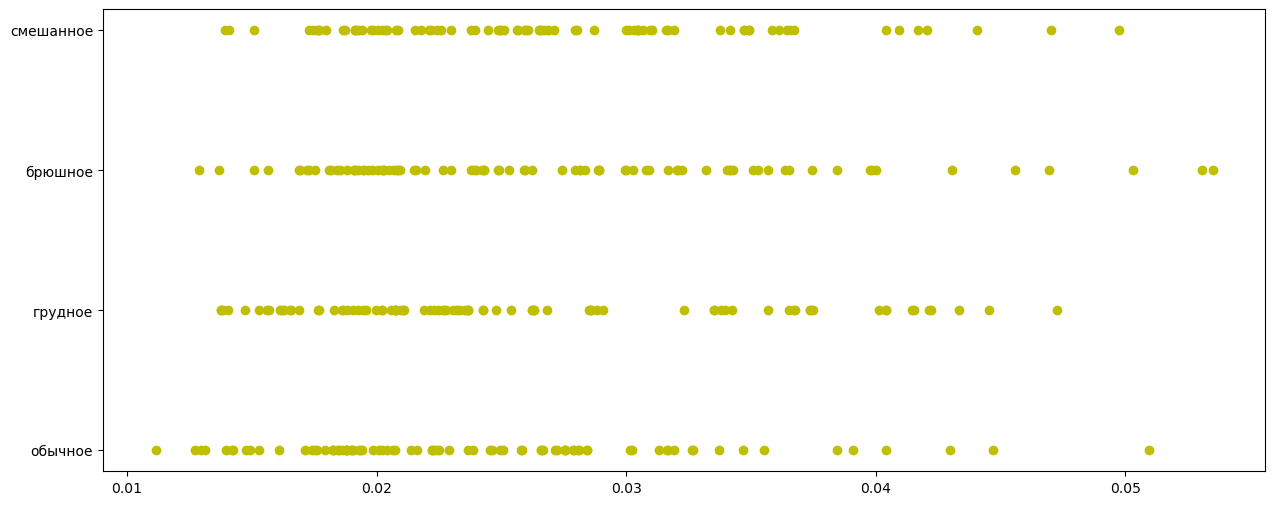

In [371]:
plt.figure(figsize=(15, 6))
plt.scatter(x=data['v1_avg'], y=data['type'], c='y')

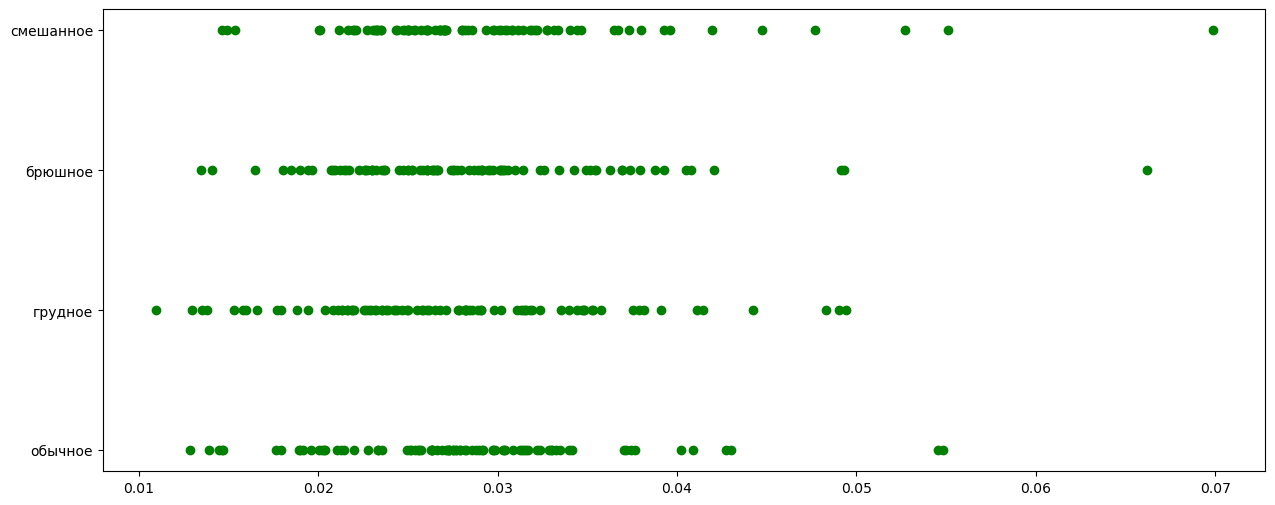

In [372]:
plt.figure(figsize=(15, 6))
plt.scatter(x=data['v2_avg'], y=data['type'], c='g')

## 4. Постановка гипотез и их проверка

Гипотеза 1: При смешанном типе дыхания амплитуда больше.

In [373]:
data.groupby(['type'])['amplitude'].mean()

type
брюшное      0.012585
грудное      0.012142
обычное      0.011516
смешанное    0.013020
Name: amplitude, dtype: float64

Действительно, можем заметить, что средняя амплитуда по смешанному типу дыхания больше остальных. Гипотеза принята.

Гипотеза 2: Люди, переболевшие ковидом, дышат чаще.

In [374]:
data.groupby(['covid'])['frequency'].mean()

covid
False    13.740331
True     13.842767
Name: frequency, dtype: float64

Можем заметить, что средняя частота дыхания у обеих групп почти одинаковая. Гипотеза отклонена.

## 5. Анализ существующих зависимостей 

Перед началом данного этапа уберём из общего набора данных записи с *обычным* типом дыхания.

In [375]:
i = data['type'] == 'обычное'
usual = data[i]
usual

,ID,birth,sex,covid,amplitude,frequency,v1_avg,v2_avg,type
0,1,04.07.2003,M,False,0.009956,13,0.042991,0.026899,обычное
4,2,07.09.2001,M,False,0.017803,14,0.022237,0.028557,обычное
8,3,14.04.2003,M,False,0.011554,14,0.028051,0.029758,обычное
12,4,24.11.2003,M,True,0.006583,14,0.022509,0.025120,обычное
16,5,29.03.2003,M,False,0.006159,14,0.027899,0.025727,обычное
...,...,...,...,...,...,...,...,...,...
324,82,30.01.2002,M,False,0.017865,13,0.027548,0.027906,обычное
328,83,05.05.2003,M,False,0.024963,14,0.022292,0.054561,обычное
332,84,01.01.2002,M,True,0.007176,13,0.022209,0.023579,обычное
336,85,14.09.2003,F,False,0.007037,13,0.018248,0.021421,обычное


In [376]:
ind = data[i].index
data = data.drop(index=ind)
data

,ID,birth,sex,covid,amplitude,frequency,v1_avg,v2_avg,type
1,1,04.07.2003,M,False,0.014353,12,0.037501,0.027864,грудное
2,1,04.07.2003,M,False,0.014028,16,0.040008,0.036282,брюшное
3,1,04.07.2003,M,False,0.014438,12,0.036109,0.031944,смешанное
5,2,07.09.2001,M,False,0.007225,14,0.023523,0.024274,грудное
6,2,07.09.2001,M,False,0.013833,16,0.038445,0.036957,брюшное
...,...,...,...,...,...,...,...,...,...
338,85,14.09.2003,F,False,0.010480,14,0.021954,0.022704,брюшное
339,85,14.09.2003,F,False,0.013309,13,0.026568,0.026831,смешанное
341,86,24.11.2003,M,False,0.013156,14,0.026230,0.028208,грудное
342,86,24.11.2003,M,False,0.011709,14,0.028158,0.029159,брюшное


## 1

Предполагаемая зависимость: корреляция расстояний между спинным-грудным и спинным-брюшным на примере двух случайных наборов.
Метод: корреляционная матрица и критерий Спирмена.

In [377]:
dels = breath[0][['del_1', 'del_2']]
dels.corr()

,del_1,del_2
del_1,1.000000,0.414096
del_2,0.414096,1.000000


In [378]:
stats.spearmanr(dels)

SpearmanrResult(correlation=0.42038312930524097, pvalue=7.580622820996013e-40)

In [379]:
dels = breath[40][['del_1', 'del_2']]
dels.corr()

,del_1,del_2
del_1,1.000000,-0.400972
del_2,-0.400972,1.000000


In [380]:
stats.spearmanr(dels)

SpearmanrResult(correlation=-0.368762949324248, pvalue=2.095301936876208e-30)

Вывод: видна нормальная корреляция между данными расстояниями.

## 2

Предполагаемая зависимость: корреляция скалярных скоростей на примере двух случайных наборов.
Метод: корреляционная матрица и критерий Спирмена

In [381]:
spd = speed[10][['v1', 'v2']]
spd.corr()

,v1,v2
v1,1.00000,0.39788
v2,0.39788,1.00000


In [382]:
stats.spearmanr(spd)

SpearmanrResult(correlation=0.472132555153518, pvalue=3.7263782801529295e-51)

In [383]:
spd = speed[55][['v1', 'v2']]
spd.corr()

,v1,v2
v1,1.000000,0.786067
v2,0.786067,1.000000


In [384]:
stats.spearmanr(spd)

SpearmanrResult(correlation=0.7042330077057489, pvalue=6.932662344950783e-136)

Вывод: видна средне-высокая корреляция между скоростями.

## 3

Предполагаемая зависимость: зависимость скоростей от факта болезни коронавирусом.
Метод: тест Краскела-Уоллиса

In [385]:
i = data['covid'] == True
group1 = data[i]
i = data['covid'] == False
group2 = data[i]

stats.kruskal(group1['v1_avg'], group2['v1_avg'])

KruskalResult(statistic=8.10678010412182, pvalue=0.004409999219179509)

In [386]:
stats.kruskal(group1['v2_avg'], group2['v2_avg'])

KruskalResult(statistic=0.1056630750470979, pvalue=0.7451367427163033)

Вывод: значение pvalue = 0.0044 для скорости 1 маркера, что меньше 0.05, это позволяет нам сказать, что предполагаемая зависимость скорости 1 маркера от коронавируса существует, однако значение pvalue = 0.7451 для скорости 2 маркера, что больше 0.05, это позволяет нам сказать, что предполагаемая зависимость скорости 2 маркера от коронавируса отсутствует.

## 4

Предполагаемая зависимость: зависимость скоростей от пола.
Метод: тест Краскела-Уоллиса

In [387]:
i = data['sex'] == 'M'
group1 = data[i]
i = data['sex'] == 'F'
group2 = data[i]

stats.kruskal(group1['v1_avg'], group2['v1_avg'])

KruskalResult(statistic=13.029465882334202, pvalue=0.00030662798945271254)

In [388]:
stats.kruskal(group1['v2_avg'], group2['v2_avg'])

KruskalResult(statistic=5.514577578895812, pvalue=0.01885862701804154)

Вывод: значение pvalue = 0.0003 для скорости 1 маркера и 0.0189 для скорости 2 маркера, что меньше 0.05, это позволяет нам сказать, что предполагаемая зависимость существует.

## 5

Предполагаемая зависимость: зависимость скоростей от типа дыхания.
Метод: тест Краскела-Уоллиса

In [391]:
i = data['type'] == 'брюшное'
group1 = data[i]
i = data['type'] == 'грудное'
group2 = data[i]
i = data['type'] == 'смешанное'
group3 = data[i]

stats.kruskal(group1['v1_avg'], group2['v1_avg'], group3['v1_avg'])

KruskalResult(statistic=2.044597604759285, pvalue=0.359766955717463)

In [392]:
stats.kruskal(group1['v2_avg'], group2['v2_avg'], group3['v2_avg'])

KruskalResult(statistic=2.136305897066722, pvalue=0.34364265726805826)

Вывод: значение pvalue = 0.3598 для скорости 1 маркера и 0.3436 для скорости 2 маркера, что больше 0.05, это позволяет нам сказать, что предполагаемая зависимость отсутствует.

## 6

Предполагаемая зависимость: зависимость амплитуда от факта болезни коронавирусом.
Метод: тест Краскела-Уоллиса

In [393]:
i = data['covid'] == True
group1 = data[i]
i = data['covid'] == False
group2 = data[i]

stats.kruskal(group1['amplitude'], group2['amplitude'])

KruskalResult(statistic=0.6897570610458535, pvalue=0.4062470255435334)

Вывод: значение pvalue = 0.4062, что больше 0.05, это позволяет нам сказать, что предполагаемая зависимость отсутствует.

## 7

Предполагаемая зависимость: зависимость амплитуда от пола.
Метод: тест Краскела-Уоллиса

In [394]:
i = data['sex'] == 'M'
group1 = data[i]
i = data['sex'] == 'F'
group2 = data[i]

stats.kruskal(group1['amplitude'], group2['amplitude'])

KruskalResult(statistic=8.819387020065195, pvalue=0.0029804677102473216)

Вывод: значение pvalue = 0.003, что меньше 0.05, это позволяет нам сказать, что предполагаемая зависимость существует.

## 8

Предполагаемая зависимость: зависимость амплитуды от типа дыхания.
Метод: тест Краскела-Уоллиса

In [395]:
i = data['type'] == 'брюшное'
group1 = data[i]
i = data['type'] == 'грудное'
group2 = data[i]
i = data['type'] == 'смешанное'
group3 = data[i]

stats.kruskal(group1['amplitude'], group2['amplitude'], group3['amplitude'])

KruskalResult(statistic=1.0596827776710054, pvalue=0.5886983364023315)

Вывод: значение pvalue = 0.5887, что больше 0.05, это позволяет нам сказать, что предполагаемая зависимость отсутствует.

## 9

Предполагаемая зависимость: зависимость частоты дыхания от факта болезни коронавирусом.
Метод: тест Краскела-Уоллиса

In [396]:
i = data['covid'] == True
group1 = data[i]
i = data['covid'] == False
group2 = data[i]

stats.kruskal(group1['frequency'], group2['frequency'])

KruskalResult(statistic=2.7095897801047366, pvalue=0.09974663833784952)

Вывод: значение pvalue = 0.1, что больше 0.05, это позволяет нам сказать, что предполагаемая зависимость отсутствует.

## 10

Предполагаемая зависимость: зависимость частоты дыхания от пола.
Метод: тест Краскела-Уоллиса

In [397]:
i = data['sex'] == 'M'
group1 = data[i]
i = data['sex'] == 'F'
group2 = data[i]

stats.kruskal(group1['frequency'], group2['frequency'])

KruskalResult(statistic=1.168345721084511, pvalue=0.2797414111571427)

Вывод: значение pvalue = 0.2797, что больше 0.05, это позволяет нам сказать, что предполагаемая зависимость отсутствует.

## 11

Предполагаемая зависимость: зависимость частоты дыхания от типа дыхания.
Метод: тест Краскела-Уоллиса

In [398]:
i = data['type'] == 'брюшное'
group1 = data[i]
i = data['type'] == 'грудное'
group2 = data[i]
i = data['type'] == 'смешанное'
group3 = data[i]

stats.kruskal(group1['frequency'], group2['frequency'], group3['frequency'])

KruskalResult(statistic=10.894333880694711, pvalue=0.004308493636079182)

Вывод: значение pvalue = 0.0043, что меньше 0.05, это позволяет нам сказать, что предполагаемая зависимость существует.

## Общий вывод раздела

Из всех проверяетмых зависимостей и корреляций подтверждены:

1. Корреляция между расстояниями маркеров
2. Корреляция между скалярными скоростями маркеров
3. Зависимость скорости грудного маркера от факта болезни человека коронавирусом
4. Зависимость скоростей датчиков от пола человека
5. Зависимость амптитуды дыхания от пола человека
6. Зависимость частоты дыхания от типа дыхания

## 6. Построения моделей

Попробуем обучить разные модели, но для начала разделим данные на обучающую и тестовую выборку в отношении 70 к 30:

In [402]:
train = data[:180]
test = data[180:]
train

,ID,birth,sex,covid,amplitude,frequency,v1_avg,v2_avg,type
1,1,04.07.2003,M,False,0.014353,12,0.037501,0.027864,грудное
2,1,04.07.2003,M,False,0.014028,16,0.040008,0.036282,брюшное
3,1,04.07.2003,M,False,0.014438,12,0.036109,0.031944,смешанное
5,2,07.09.2001,M,False,0.007225,14,0.023523,0.024274,грудное
6,2,07.09.2001,M,False,0.013833,16,0.038445,0.036957,брюшное
...,...,...,...,...,...,...,...,...,...
237,60,10.06.2002,M,True,0.010108,14,0.016223,0.031091,грудное
238,60,10.06.2002,M,True,0.011970,16,0.018104,0.021580,брюшное
239,60,10.06.2002,M,True,0.013426,14,0.019866,0.026067,смешанное
241,61,30.10.2002,F,False,0.011934,14,0.022696,0.026518,грудное


Помимо этого разделим оба набора на целевую переменную и остальные. Исключим ID и дату рождения участников. И сделаем пол - категориальной переменной, где 1 - "F", 0 - "M":

In [403]:
train_y = train['type']
train_x = train.drop(columns=['ID','type', 'birth'])

i = train_x['sex'] == 'F'
train_x.loc[i,'sex'] = 1
i = train_x['sex'] == 'M'
train_x.loc[i,'sex'] = 0

train_x

,sex,covid,amplitude,frequency,v1_avg,v2_avg
1,0,False,0.014353,12,0.037501,0.027864
2,0,False,0.014028,16,0.040008,0.036282
3,0,False,0.014438,12,0.036109,0.031944
5,0,False,0.007225,14,0.023523,0.024274
6,0,False,0.013833,16,0.038445,0.036957
...,...,...,...,...,...,...
237,0,True,0.010108,14,0.016223,0.031091
238,0,True,0.011970,16,0.018104,0.021580
239,0,True,0.013426,14,0.019866,0.026067
241,1,False,0.011934,14,0.022696,0.026518


In [404]:
test_y = test['type']
test_x = test.drop(columns=['ID','type', 'birth'])
i = test_x['sex'] == 'F'
test_x.loc[i,'sex'] = 1
i = test_x['sex'] == 'M'
test_x.loc[i,'sex'] = 0
test_x

,sex,covid,amplitude,frequency,v1_avg,v2_avg
245,1,False,0.011479,13,0.021087,0.027108
246,1,False,0.011535,12,0.020507,0.026424
247,1,False,0.010165,14,0.022083,0.028028
249,0,True,0.009659,15,0.021912,0.022688
250,0,True,0.009575,15,0.019096,0.020805
...,...,...,...,...,...,...
338,1,False,0.010480,14,0.021954,0.022704
339,1,False,0.013309,13,0.026568,0.026831
341,0,False,0.013156,14,0.026230,0.028208
342,0,False,0.011709,14,0.028158,0.029159


### 1) Логистическая регрессия

In [405]:
from sklearn.linear_model import LogisticRegression

Создаём экземпляр модели:

In [406]:
logreg = LogisticRegression()

Обучаем модель:

In [407]:
logreg.fit(train_x, train_y)

LogisticRegression()

Проверяем точность прогноза:

In [451]:
pred_y = logreg.predict(test_x)
print('Точность классификатора логистической регрессии'
      +' на тестовом наборе: {:.4f}'.format(logreg.score(test_x, test_y)))

Точность классификатора логистической регрессии на тестовом наборе: 0.4133


### 2) Метод опорных векторов

In [409]:
from sklearn.svm import SVC

Создаём экземпляр модели:

In [410]:
SVC_model = SVC()

Обучаем модель:

In [411]:
SVC_model.fit(train_x, train_y)

SVC()

Проверяем точность прогноза:

In [422]:
pred_y = SVC_model.predict(test_x)
print('Точность классификатора методом опорных векторов'
      +' на тестовом наборе: {:.4f}'.format(SVC_model.score(test_x, test_y)))

Точность классификатора методом опорных векторов на тестовом наборе: 0.4133


### 3) Метод k-ближайших соседей

In [413]:
from sklearn.neighbors import KNeighborsClassifier

Создаём экземпляр модели:

In [414]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

Обучаем модель:

In [415]:
KNN_model.fit(train_x, train_y)

KNeighborsClassifier()

Проверяем точность прогноза:

In [423]:
pred_y = KNN_model.predict(test_x)
print('Точность классификатора методом k-ближайших соседей'
      +' на тестовом наборе: {:.4f}'.format(KNN_model.score(test_x, test_y)))

Точность классификатора методом k-ближайших соседей на тестовом наборе: 0.3600


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### 4) Классификатор дерева решений

In [424]:
from sklearn.tree import DecisionTreeClassifier

Создаём экземпляр модели:

In [425]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

Обучаем модель:

In [426]:
tree.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4, random_state=1)

Проверяем точность прогноза:

In [427]:
pred_y = tree.predict(test_x)
print('Точность классификатора дерева решений'
      +' на тестовом наборе: {:.4f}'.format(tree.score(test_x, test_y)))

Точность классификатора дерева решений на тестовом наборе: 0.3600


### 5) Случайный лес

In [428]:
from sklearn.ensemble import RandomForestClassifier

Создаём экземпляр модели:

In [429]:
random_forest = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

Обучаем модель:

In [430]:
random_forest.fit(train_x, train_y)

RandomForestClassifier(max_features='sqrt')

Проверяем точность прогноза:

In [431]:
pred_y = random_forest.predict(test_x)
print('Точность классификатора случайного леса'
      +' на тестовом наборе: {:.4f}'.format(random_forest.score(test_x, test_y)))

Точность классификатора случайного леса на тестовом наборе: 0.3867


### 6) Многослойный перцептрон

In [432]:
from sklearn.neural_network import MLPClassifier

Создаём экземпляр модели:

In [433]:
clf = MLPClassifier(solver ='lbfgs', alpha =1e-5, hidden_layer_sizes=(5,2 ), random_state=1)

Обучаем модель:

In [434]:
clf.fit(train_x, train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

Проверяем точность прогноза:

In [435]:
pred_y = clf.predict(test_x)
print('Точность нейросети на основе многослойного перцептрона'
      +' на тестовом наборе: {:.4f}'.format(clf.score(test_x, test_y)))

Точность нейросети на основе многослойного перцептрона на тестовом наборе: 0.3333


### 7) Линейный дискриминантный анализ

In [436]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Создаём экземпляр модели:

In [437]:
lda = LDA(n_components=1)

Обучаем модель:

In [438]:
lda.fit(train_x, train_y)

LinearDiscriminantAnalysis(n_components=1)

Проверяем точность прогноза:

In [439]:
pred_y = lda.predict(test_x)
print('Точность линейного лискриминантного анализа'
      +' на тестовом наборе: {:.4f}'.format(lda.score(test_x, test_y)))

Точность линейного лискриминантного анализа на тестовом наборе: 0.4400


### 8) Повышение градиента для классификации

In [440]:
from sklearn.ensemble import GradientBoostingClassifier

Создаём экземпляр модели:

In [441]:
clf = GradientBoostingClassifier(n_estimators= 100, learning_rate= 1.0, max_depth= 1, random_state= 0)

Обучаем модель:

In [442]:
clf.fit(train_x, train_y)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

Проверяем точность прогноза:

In [443]:
pred_y = clf.predict(test_x)
print('Точность классификатора с повышением градиента для классификации'
      +' на тестовом наборе: {:.4f}'.format(clf.score(test_x, test_y)))

Точность классификатора с повышением градиента для классификации на тестовом наборе: 0.4000


## Выводы раздела:

**Максимальный результат моделей - 44%. В числе лучших: LinearDiscriminantAnalysis, Метод опорных векторов, Линейная регрессия и GradientBoostingClassifier.**

## Используем лучшую модель для замеров обычного дыхания

Подготовим данные:

In [447]:
usual_for_pred = usual.drop(columns=['ID', 'birth', 'type'])
i = usual_for_pred['sex'] == 'F'
usual_for_pred.loc[i,'sex'] = 1
i = usual_for_pred['sex'] == 'M'
usual_for_pred.loc[i,'sex'] = 0
usual_for_pred

,sex,covid,amplitude,frequency,v1_avg,v2_avg
0,0,False,0.009956,13,0.042991,0.026899
4,0,False,0.017803,14,0.022237,0.028557
8,0,False,0.011554,14,0.028051,0.029758
12,0,True,0.006583,14,0.022509,0.025120
16,0,False,0.006159,14,0.027899,0.025727
...,...,...,...,...,...,...
324,0,False,0.017865,13,0.027548,0.027906
328,0,False,0.024963,14,0.022292,0.054561
332,0,True,0.007176,13,0.022209,0.023579
336,1,False,0.007037,13,0.018248,0.021421


Сделаем прогноз:

In [450]:
pred = lda.predict(usual_for_pred)
usual.insert(8,'pred_type', pred)
usual

,ID,birth,sex,covid,amplitude,frequency,v1_avg,v2_avg,pred_type,type
0,1,04.07.2003,M,False,0.009956,13,0.042991,0.026899,брюшное,обычное
4,2,07.09.2001,M,False,0.017803,14,0.022237,0.028557,смешанное,обычное
8,3,14.04.2003,M,False,0.011554,14,0.028051,0.029758,брюшное,обычное
12,4,24.11.2003,M,True,0.006583,14,0.022509,0.025120,грудное,обычное
16,5,29.03.2003,M,False,0.006159,14,0.027899,0.025727,брюшное,обычное
...,...,...,...,...,...,...,...,...,...,...
324,82,30.01.2002,M,False,0.017865,13,0.027548,0.027906,грудное,обычное
328,83,05.05.2003,M,False,0.024963,14,0.022292,0.054561,смешанное,обычное
332,84,01.01.2002,M,True,0.007176,13,0.022209,0.023579,грудное,обычное
336,85,14.09.2003,F,False,0.007037,13,0.018248,0.021421,грудное,обычное


## Полученные результаты верны с вероятностью около 44 %